In [110]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [111]:
na_val = "-" 
df = pd.read_csv('covid_19_india.csv', index_col= 'Sno', na_values=na_val, parse_dates=["Date", "Time"])

# pd.to_datetime(df['Time'])

C:\Users\hp\AppData\Local\Temp\ipykernel_42336\1301578257.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('covid_19_india.csv', index_col= 'Sno', na_values=na_val, parse_dates=["Date", "Time"])


In [112]:
# df = pd.reset_option('display.max_rows')

In [113]:
df

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Sno,,,,,,,,
1,2020-01-30,2025-05-15 18:00:00,Kerala,1.0,0.0,0,0,1
2,2020-01-31,2025-05-15 18:00:00,Kerala,1.0,0.0,0,0,1
3,2020-02-01,2025-05-15 18:00:00,Kerala,2.0,0.0,0,0,2
4,2020-02-02,2025-05-15 18:00:00,Kerala,3.0,0.0,0,0,3
5,2020-02-03,2025-05-15 18:00:00,Kerala,3.0,0.0,0,0,3
...,...,...,...,...,...,...,...,...
18106,2021-08-11,2025-05-15 08:00:00,Telangana,NaN,NaN,638410,3831,650353
18107,2021-08-11,2025-05-15 08:00:00,Tripura,NaN,NaN,77811,773,80660
18108,2021-08-11,2025-05-15 08:00:00,Uttarakhand,NaN,NaN,334650,7368,342462


In [114]:
#1. How many rows and columns are in the dataset?    

df.shape

(18110, 8)

In [115]:
#2.What are the data types of each column?    

df.info()    

<class 'pandas.core.frame.DataFrame'>
Index: 18110 entries, 1 to 18110
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      18110 non-null  datetime64[ns]
 1   Time                      18110 non-null  datetime64[ns]
 2   State/UnionTerritory      18110 non-null  object        
 3   ConfirmedIndianNational   446 non-null    float64       
 4   ConfirmedForeignNational  446 non-null    float64       
 5   Cured                     18110 non-null  int64         
 6   Deaths                    18110 non-null  int64         
 7   Confirmed                 18110 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(3), object(1)
memory usage: 1.2+ MB


In [116]:
p = df['State/UnionTerritory'].value_counts()

p

State/UnionTerritory
Kerala                                      560
Delhi                                       528
Rajasthan                                   527
Uttar Pradesh                               526
Haryana                                     526
Ladakh                                      523
Tamil Nadu                                  523
Jammu and Kashmir                           521
Punjab                                      521
Maharashtra                                 520
Karnataka                                   520
Andhra Pradesh                              518
Uttarakhand                                 515
Odisha                                      514
West Bengal                                 512
Puducherry                                  512
Chandigarh                                  511
Chhattisgarh                                511
Gujarat                                     510
Himachal Pradesh                            508
Madhya Pradesh     

In [118]:
df['State/UnionTerritory'].value_counts().max()

np.int64(560)

In [119]:
#3.Are there any missing values in the dataset? If yes, in which columns?  

df.isnull().sum()


Date                            0
Time                            0
State/UnionTerritory            0
ConfirmedIndianNational     17664
ConfirmedForeignNational    17664
Cured                           0
Deaths                          0
Confirmed                       0
dtype: int64

In [120]:
#5.How many unique states or union territories are present in the dataset?

unique_states = df['State/UnionTerritory'].nunique()
print(f'The total number of unique states: {unique_states}')



The total number of unique states: 46


In [121]:
# 6.What are the five most frequent states in the dataset?

top_states = df['State/UnionTerritory'].value_counts().head(5)
top_states

State/UnionTerritory
Kerala           560
Delhi            528
Rajasthan        527
Uttar Pradesh    526
Haryana          526
Name: count, dtype: int64

In [122]:
# 7. Are there any duplicate rows in the dataset?

duplicate_rows = df.duplicated()

# Count total duplicates
num_duplicates = duplicate_rows.sum()

if num_duplicates == 0:
    print("There are no duplicate rows in the dataset.")
else:
    print(f"There are {num_duplicates} duplicate rows in the dataset.")

There are no duplicate rows in the dataset.


In [123]:
# 8.What is the total number of confirmed cases recorded in the dataset?

total_confirmed_cases = df['Confirmed'].sum()

print(f'The total number of confirmed cases: {total_confirmed_cases}')

The total number of confirmed cases: 5451678687


In [124]:
# 9.How many records contain foreign national confirmed cases?

foreign_confirmed_cases = df[df['ConfirmedForeignNational'] > 0].shape[0]

print(f'The total foreign national confirmed cases: {foreign_confirmed_cases}')

The total foreign national confirmed cases: 132


In [125]:
# 10.What is the total number of cured cases in the dataset?

total_cured_cases = df['Cured'].sum()
print(f'The total number of cured cases: {total_cured_cases}')

The total number of cured cases: 5046125452


In [126]:
# 11.Which state has reported the highest number of confirmed cases?

highest_number_of_confirmed_cases = df.groupby('State/UnionTerritory')['Confirmed'].sum().sort_values(ascending=False).head(1)

highest_number_of_confirmed_cases

State/UnionTerritory
Maharashtra    1121491467
Name: Confirmed, dtype: int64

In [127]:
# 12.Which state has reported the lowest number of confirmed cases?

lowest_number_of_confirmed_cases = df.groupby('State/UnionTerritory')['Confirmed'].sum().sort_values().head(1)

lowest_number_of_confirmed_cases

State/UnionTerritory
Daman & Diu    2
Name: Confirmed, dtype: int64

In [128]:
# 13.What is the average number of confirmed cases per state?

confirmed_cases_per_state = df.groupby('State/UnionTerritory')['Confirmed'].mean()

print("Average number of confirmed cases per state/union territory:")
print(confirmed_cases_per_state)

Average number of confirmed cases per state/union territory:
State/UnionTerritory
Andaman and Nicobar Islands                 3.846226e+03
Andhra Pradesh                              7.575922e+05
Arunachal Pradesh                           1.446957e+04
Assam                                       2.004759e+05
Bihar                                       2.613264e+05
Bihar****                                   7.154545e+05
Cases being reassigned to states            5.759417e+03
Chandigarh                                  2.124976e+04
Chhattisgarh                                3.205015e+05
Dadra and Nagar Haveli                      1.036100e+04
Dadra and Nagar Haveli and Daman and Diu    4.205275e+03
Daman & Diu                                 2.000000e+00
Delhi                                       5.439920e+05
Goa                                         5.603206e+04
Gujarat                                     2.812158e+05
Haryana                                     2.554131e+05
Himach

In [129]:
# 14.What is the median number of confirmed cases in the dataset?

median_confirmed_cases = df['Confirmed'].median()

print(f"Median number of confirmed cases: {median_confirmed_cases}")

Median number of confirmed cases: 39773.5


In [130]:
# 15.How many states have reported more than 10,000 confirmed cases?

confirmed_cases_in_states = df.groupby('State/UnionTerritory')['Confirmed'].sum()

states_above_10k = confirmed_cases_in_states[confirmed_cases_in_states > 10000]

count_states_above_10k = states_above_10k.count()

print(f'The total number of states that have reported > 10000 confirmed cases is: {count_states_above_10k}')

The total number of states that have reported > 10000 confirmed cases is: 44


In [131]:
# 16.Which date recorded the highest number of confirmed cases?

highest_date_of_confirmed_cases = df.groupby('Date')['Confirmed'].sum().sort_values(ascending=False).head(1)

print(f' The date recorded the highest number of confirmed cases: {highest_date_of_confirmed_cases}')


 The date recorded the highest number of confirmed cases: Date
2021-08-11    32036511
Name: Confirmed, dtype: int64


In [136]:
# 17.What is the total number of confirmed cases across all states on a specific date (e.g., 2020-05-01)?

specific_date = df[df['Date'] == '2020-05-01']['Confirmed'].sum() 

print(f'The total number of confirmed cases on 2020-05-01 is: {specific_date} case.')

The total number of confirmed cases on 2020-05-01 is: 34972 case.


In [ ]:
# 18.What is the daily average number of confirmed cases?

daily_average = df.groupby('Date')['Confirmed'].mean()

print(f'The total daily average per day is: {daily_average}')

The total daily average per day is: Date
2020-01-30         1.000000
2020-01-31         1.000000
2020-02-01         2.000000
2020-02-02         3.000000
2020-02-03         3.000000
                  ...      
2021-08-07    885982.916667
2021-08-08    887068.194444
2021-08-09    888054.277778
2021-08-10    888837.722222
2021-08-11    889903.083333
Name: Confirmed, Length: 560, dtype: float64


In [149]:
# 19.How many days had more than 500 confirmed cases reported?

# cases = df[df['Confirmed'] > 500]

daily_total = df.groupby('Date')['Confirmed'].sum()

days_above_500 = daily_total[daily_total > 500]

days_above_500



Date
2020-03-24         519
2020-03-25         606
2020-03-26         694
2020-03-27         724
2020-03-28         909
                ...   
2021-08-07    31895385
2021-08-08    31934455
2021-08-09    31969954
2021-08-10    31998158
2021-08-11    32036511
Name: Confirmed, Length: 506, dtype: int64

In [ ]:
# 20.How does the number of confirmed cases vary across states?

confirmed_by_state = df.groupby('State/UnionTerritory')['Confirmed'].sum().sort_values(ascending=False)

print("Confirmed cases by state:")
print(confirmed_by_state)



Confirmed cases by state:
State/UnionTerritory
Maharashtra                                 1121491467
Karnataka                                    485970693
Kerala                                       458906023
Tamil Nadu                                   431928644
Andhra Pradesh                               392432753
Uttar Pradesh                                312625843
Delhi                                        287227765
West Bengal                                  263107876
Chhattisgarh                                 163776262
Rajasthan                                    162369656
Odisha                                       160130533
Gujarat                                      143420082
Madhya Pradesh                               135625265
Haryana                                      134347285
Bihar                                        132231166
Punjab                                        99949702
Assam                                         99837011
Telengana         

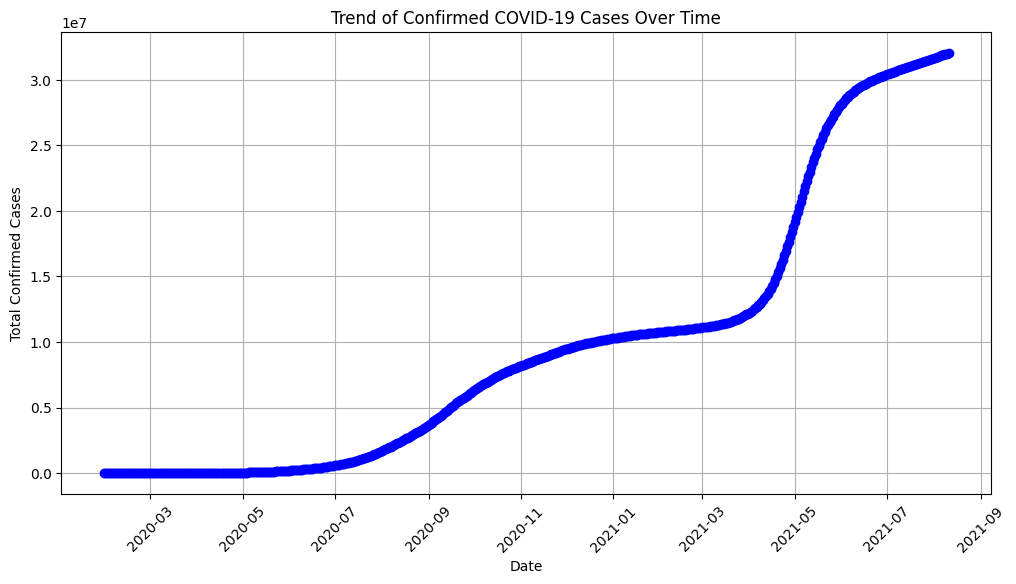

In [ ]:
# 21.Can you plot the trend of confirmed cases over time?

daily_confirmed = df.groupby('Date')['Confirmed'].sum()

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(daily_confirmed.index, daily_confirmed.values, marker='o', linestyle='-', color='blue')
plt.title('Trend of Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

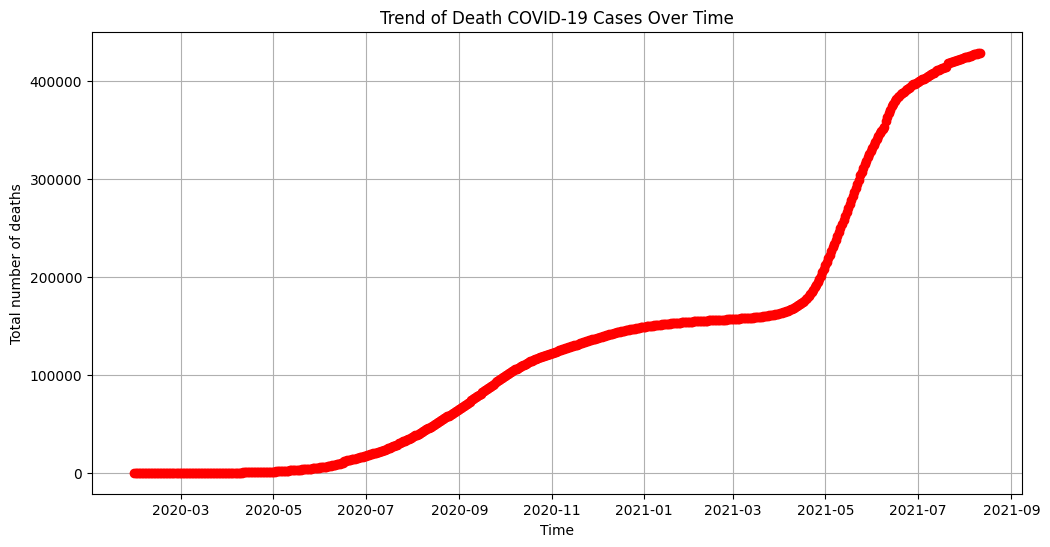

In [167]:
# 22.Can you plot the trend of deaths over time?

daily_deaths = df.groupby('Date')['Deaths'].sum()


# plot the trend:

plt.figure(figsize=(12,6))
plt.plot(daily_deaths.index, daily_deaths.values, marker="o", color='red')
plt.title('Trend of Death COVID-19 Cases Over Time')
plt.xlabel('Time')
plt.ylabel('Total number of deaths')
plt.grid(True)
plt.show()


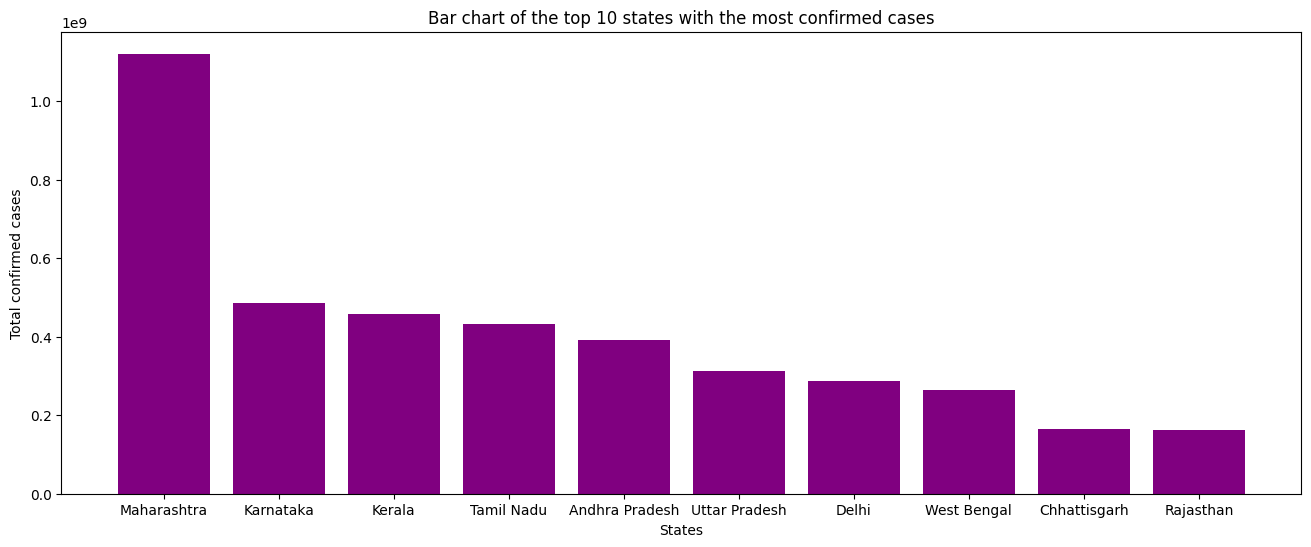

In [ ]:
# 23.Can you create a bar chart of the top 10 states with the most confirmed cases?

top_10_states = df.groupby('State/UnionTerritory')['Confirmed'].sum().sort_values(ascending=False).head(10)

# plot the top 10 states:
plt.figure(figsize=(16,6))
plt.bar(top_10_states.index, top_10_states.values, color='purple')
plt.title("Bar chart of the top 10 states with the most confirmed cases")
plt.xlabel('States')
plt.ylabel('Total confirmed cases')
plt.show()

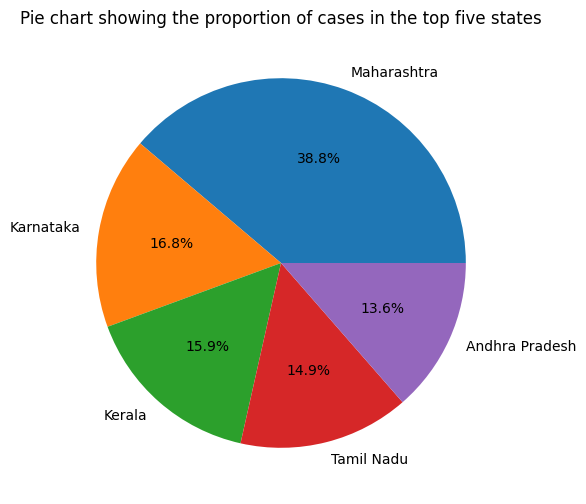

In [186]:
#24.Can you create a pie chart showing the proportion of cases in the top five states?

proportion_of_cases_in_top_5_states = df.groupby('State/UnionTerritory')['Confirmed'].sum().sort_values(ascending=False).head(5)

# plot the proportion

plt.figure(figsize=(12,6))
plt.pie(proportion_of_cases_in_top_5_states, labels=proportion_of_cases_in_top_5_states.index, autopct= '%1.1f%%')
plt.title('Pie chart showing the proportion of cases in the top five states')
plt.show()

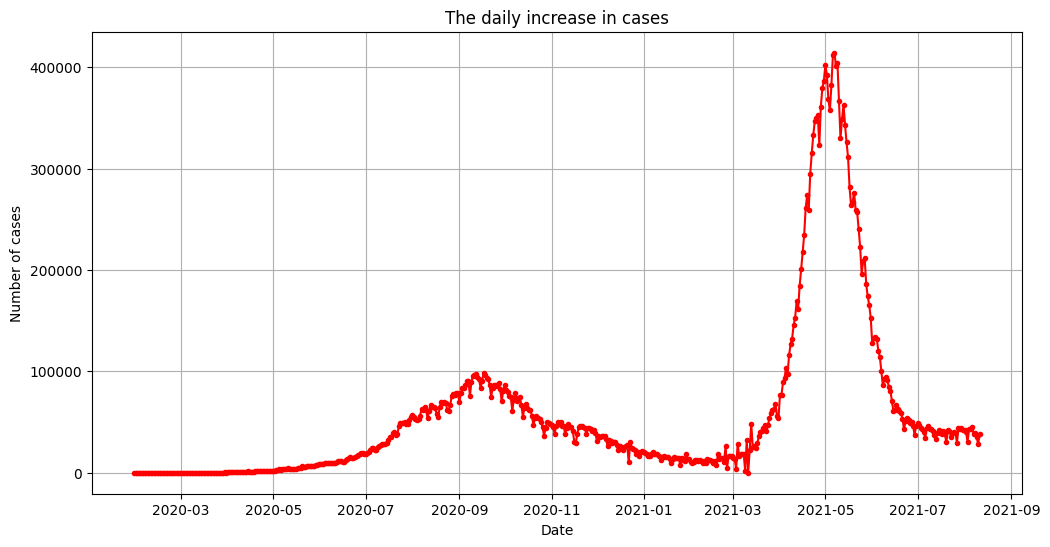

In [194]:
# 25.Can you visualize the daily increase in cases using a line graph?

daily_totals = df.groupby('Date')['Confirmed'].sum()
daily_increase = daily_totals.diff().fillna(0)

# plot the daily increase cases:
plt.figure(figsize=(12,6))
plt.plot(daily_increase.index, daily_increase.values, color='red', marker='.')
plt.title('The daily increase in cases')
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.grid(True)
